## Numpy( why )

numpy also has its own convenient functions for __quickly making arrays of values__. 

`np.arange(min, max, step)` makes a list of values from min to max (not inclusive), adding by "sep" each time.

`np.linspace(min, max, num_points)` makes a list of num_points values from min to max (not inclusive)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np

In [51]:
np.random.normal(0, 1)

0.12815860227007228

In [52]:
%%time
length = 10000000
res = []
for i in range(length):
    res.append(np.random.normal(0, 1))

CPU times: user 20.8 s, sys: 366 ms, total: 21.1 s
Wall time: 21.3 s


In [54]:
res[:5]

[-0.7116807942184739,
 -0.22450511140570684,
 -0.15550304404206677,
 0.867957079977315,
 -0.8289514602100025]

In [55]:
type(res)

list

In [56]:
len(res)

10000000

In [57]:
%%time
np_list = np.random.normal(0, 1, length)

CPU times: user 354 ms, sys: 3.29 ms, total: 357 ms
Wall time: 358 ms


In [58]:
len(np_list)

10000000

In [59]:
type(np_list)

numpy.ndarray

In [61]:
np_list[:5]

array([ 0.22058147, -0.40783484, -0.77225614, -0.72510721, -0.34580305])

In [42]:
print "\nTime to create long random list using numpy function"
%time np_long_random_list = np.random.normal(0,1, length)


Time to create long random list using numpy function
CPU times: user 423 ms, sys: 60.8 ms, total: 484 ms
Wall time: 504 ms


In [42]:
type(np_long_random_list)

numpy.ndarray

In [43]:
len(res)

10000000

In [44]:
len(np_long_random_list)

10000000

In [11]:
np_long_random_list[0:10]

array([ 0.68992456, -0.98179619, -0.42184928,  0.4799481 , -1.05298978,
        0.12233386,  0.43645911,  0.37120121,  2.4503524 ,  0.32377982])

In [9]:
type(np_long_random_list)

numpy.ndarray

In [3]:
np_long_random_list[:10]

array([ 0.21839078, -0.94884362, -1.71426954, -0.04085854,  0.7586111 ,
       -0.30818951, -0.09596724, -0.0830166 , -0.19698686,  0.58213493])

In [63]:
print "\nTime to add one number to every element of a long random list, list comprehensions "
%time add_list = [i + 4 for i in res]

print "\nTime to add one number to every element of a long random list, using numpy "
%time np_add_list = 4 + np_list


Time to add one number to every element of a long random list, list comprehensions 
CPU times: user 1.42 s, sys: 583 ms, total: 2.01 s
Wall time: 2.15 s

Time to add one number to every element of a long random list, using numpy 
CPU times: user 28.4 ms, sys: 37.6 ms, total: 66 ms
Wall time: 65.4 ms


In [15]:
type(long_random_list)

list

In [14]:
type(np_long_random_list)

numpy.ndarray

In [13]:
print "\nTime to multiply one number to every element of a long random list, list comprehensions "
%time add_list = [i * 4 for i in long_random_list]

print "\nTime to multiply one number to every element of a long random list, using numpy "
%time np_add_list = 4 * np_long_random_list


Time to multiply one number to every element of a long random list, list comprehensions 
CPU times: user 1.13 s, sys: 82.7 ms, total: 1.21 s
Wall time: 1.23 s

Time to multiply one number to every element of a long random list, using numpy 
CPU times: user 16.7 ms, sys: 32.3 ms, total: 49.1 ms
Wall time: 50.7 ms


In [ ]:
%%time

### Add Lists 

In [58]:
# long_random_list2 =  [np.random.normal(0, 1) for i in range(length)]
# np_long_random_list2 = np.random.normal(0, 1, length)

# print "Time to add two lists using list comprehensions"
# %time a = [long_random_list[i] + long_random_list2[i] for i in range(length)]

# # To add all the elements of two arrays, just use addition! No list comprehension needed.

# print "Time to add two lists using numpy"
# %time np_long_random_list + np_long_random_list2

# print "Done"

# Better than Lists

The `where` function also makes it easy to find the indices in numpy that satisfy a certain criterion. 

Below, the criterion is which numbers are greater than 5 standard deviations away from the center of a normal distribution.

In [15]:
threshold = 5
length = 10000000
long_random_list = np.random.binomial(0, 1, length)

%time print "The indices where the long random list is above threshold are: ", [i for i in range(length) if long_random_list[i] > threshold]

%time print "The indices where the long random list is above threshold are: ", np.where(long_random_list > threshold)

The indices where the long random list is above threshold are:  []
CPU times: user 3.28 s, sys: 73.8 ms, total: 3.36 s
Wall time: 3.43 s
The indices where the long random list is above threshold are:  (array([], dtype=int64),)
CPU times: user 10.2 ms, sys: 4.63 ms, total: 14.8 ms
Wall time: 14.8 ms


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
datafile = 'trees.txt'

In [2]:
!head $datafile

Index	Girth	Height	Volume
1	8.3	70	10.3
2	8.6	65	10.3
3	8.8	63	10.2
4	10.5	72	16.4
5	10.7	81	18.8
6	10.8	83	19.7
7	11	66	15.6
8	11	75	18.2
9	11.1	80	22.6


The `csv.reader` function just reads every line into a list.
The `eval` function takes a string and converts it to a corresponding time. For example
```python
eval("3.0") = 3.0
eval("-2") = -2
eval("[5,6,7,8]") = [5,6,7,8]
```

In [3]:
girths = []
heights = []
volumes = []

with open(datafile, 'rU') as csvfile:
    reader = csv.DictReader(csvfile, delimiter='\t')
    
    # skip the first line
    
    for row in reader:
        girths.append(eval(row['Girth']))
        heights.append(eval(row['Height']))
        volumes.append(eval(row['Volume']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


In [4]:
print("Girths: ", girths[0:10])
print("Heights: ", heights[0:10])
print("Volumes: ", volumes[0:10])

Girths:  [8.3, 8.6, 8.8, 10.5, 10.7, 10.8, 11, 11, 11.1, 11.2]
Heights:  [70, 65, 63, 72, 81, 83, 66, 75, 80, 75]
Volumes:  [10.3, 10.3, 10.2, 16.4, 18.8, 19.7, 15.6, 18.2, 22.6, 19.9]


In [50]:
len(heights)

31

In [5]:
print("Mean of girths is ", np.mean(girths))
print("Median of girths is ", np.median(girths))
print("Standard deviation of girths is ", np.std(girths))
print("25th percentile of girths is ", np.percentile(girths, 25))

from scipy import stats
print("10 is at the following percentile in girths:", stats.percentileofscore(girths, 10))

Mean of girths is  13.248387096774195
Median of girths is  12.9
Standard deviation of girths is  3.087108571791257
25th percentile of girths is  11.05
10 is at the following percentile in girths: 9.67741935483871


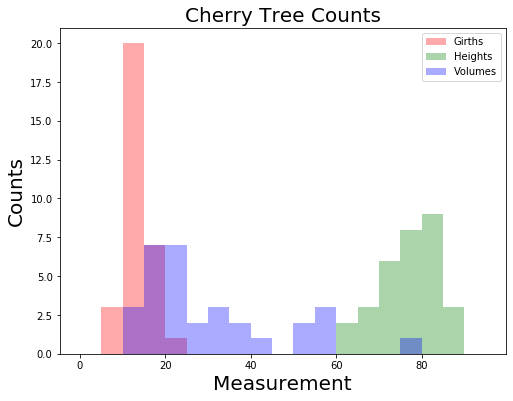

In [6]:
%matplotlib inline

bins = range(0,100,5)
plt.figure(figsize=(8, 6)) # Calling "figure" creates a new figure. The command inside controls the figure size, in inches


plt.hist(girths, bins=bins, color='red', alpha=1.0/3, label='Girths')
plt.hist(heights, bins=bins, color='green', alpha=1.0/3, label='Heights')
plt.hist(volumes, bins=bins, color='blue', alpha=1.0/3, label = 'Volumes')








plt.legend()
plt.title("Cherry Tree Counts", fontsize=20)
plt.xlabel("Measurement", fontsize=20)
plt.ylabel("Counts", fontsize=20)
plt.show() #This shows the figure

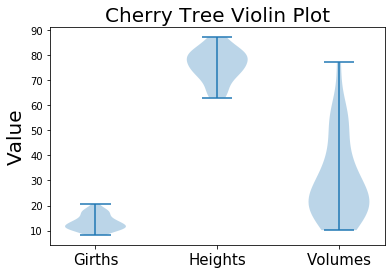

In [7]:
pos = [1, 2, 3]
data = [girths, heights, volumes]
plt.figure()
plt.violinplot(data, pos, widths=0.5)

my_xticks = ['Girths','Heights','Volumes']
plt.xticks(pos, my_xticks, fontsize=15)



plt.title("Cherry Tree Violin Plot", fontsize=20)
plt.ylabel("Value", fontsize=20)
plt.show()

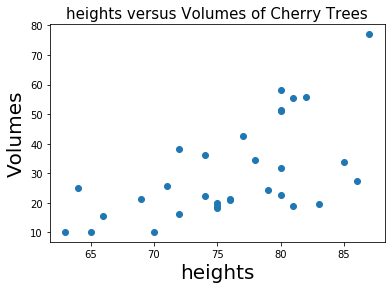

In [8]:
plt.figure()
# plt.xkcd()
plt.scatter(heights, volumes)
plt.xlabel("heights", fontsize=20)
plt.ylabel("Volumes", fontsize=20)
plt.title("heights versus Volumes of Cherry Trees", fontsize=15)
plt.show()

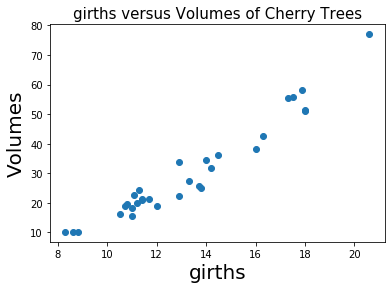

In [9]:
plt.figure()
# plt.xkcd()
plt.scatter(girths, volumes)
plt.xlabel("girths", fontsize=20)
plt.ylabel("Volumes", fontsize=20)
plt.title("girths versus Volumes of Cherry Trees", fontsize=15)
plt.show()

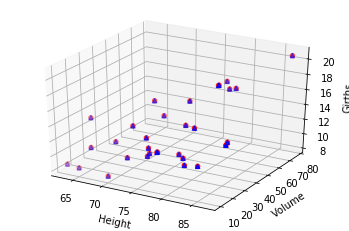

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# plt.xkcd()
# # Fixing random state for reproducibility
# np.random.seed(19680801)


# def randrange(n, vmin, vmax):
#     '''
#     Helper function to make an array of random numbers having shape (n, )
#     with each number distributed Uniform(vmin, vmax).
#     '''
#     return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = heights
    ys = volumes
    zs = girths
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Height')
ax.set_ylabel('Volume')
ax.set_zlabel('Girths')

plt.show()

In [12]:
print("Correlation matrix is ", np.corrcoef(heights, volumes)[0][1])
print ("Correlation Coefficient is ", np.corrcoef(girths, volumes)[0][1])

Correlation matrix is  0.5982496519917821
Correlation Coefficient is  0.9671193682556305


In [18]:
np_data = np.array([girths,heights])

In [19]:
np_data.shape

(2, 31)

In [20]:
np_data

array([[ 8.3,  8.6,  8.8, 10.5, 10.7, 10.8, 11. , 11. , 11.1, 11.2, 11.3,
        11.4, 11.4, 11.7, 12. , 12.9, 12.9, 13.3, 13.7, 13.8, 14. , 14.2,
        14.5, 16. , 16.3, 17.3, 17.5, 17.9, 18. , 18. , 20.6],
       [70. , 65. , 63. , 72. , 81. , 83. , 66. , 75. , 80. , 75. , 79. ,
        76. , 76. , 69. , 75. , 74. , 85. , 86. , 71. , 64. , 78. , 80. ,
        74. , 72. , 77. , 81. , 82. , 80. , 80. , 80. , 87. ]])

In [21]:
np_data= np_data.transpose()

In [22]:
np_data.shape

(31, 2)

In [23]:
np_data

array([[ 8.3, 70. ],
       [ 8.6, 65. ],
       [ 8.8, 63. ],
       [10.5, 72. ],
       [10.7, 81. ],
       [10.8, 83. ],
       [11. , 66. ],
       [11. , 75. ],
       [11.1, 80. ],
       [11.2, 75. ],
       [11.3, 79. ],
       [11.4, 76. ],
       [11.4, 76. ],
       [11.7, 69. ],
       [12. , 75. ],
       [12.9, 74. ],
       [12.9, 85. ],
       [13.3, 86. ],
       [13.7, 71. ],
       [13.8, 64. ],
       [14. , 78. ],
       [14.2, 80. ],
       [14.5, 74. ],
       [16. , 72. ],
       [16.3, 77. ],
       [17.3, 81. ],
       [17.5, 82. ],
       [17.9, 80. ],
       [18. , 80. ],
       [18. , 80. ],
       [20.6, 87. ]])

In [26]:
# we need to send only array of vectors

In [41]:
y = np.array([volumes])

In [27]:
y.shape

(1, 31)

In [42]:
y = y.transpose()

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <a list of 10 Patch objects>)

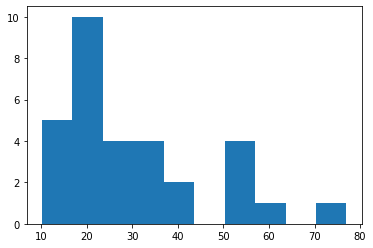

In [29]:
plt.hist(y)

In [31]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.svm import SVR
reg = SVR()

In [33]:
x = np_data

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x.shape, x_train.shape, x_test.shape)

(31, 2) (23, 2) (8, 2)


In [35]:
reg.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
predicted = reg.predict(x_test)
expected = y_test

In [37]:
predicted

array([25.01386215, 23.94607834, 24.05285472, 24.61495274, 24.19555137,
       23.64414872, 23.48671352, 23.88883337])

In [38]:
expected

array([[55.7],
       [24.2],
       [24.9],
       [27.4],
       [31.7],
       [22.2],
       [22.6],
       [10.3]])

In [44]:
reg = PassiveAggressiveRegressor()

In [45]:
reg.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
predicted = reg.predict(x_test)
expected = y_test

In [47]:
predicted

array([26.97092314, 21.22282796, 29.61889655, 25.27857521, 26.43800716,
       31.5531702 , 28.77083552, 25.80130087])

In [48]:
expected

array([[19.7],
       [10.3],
       [42.6],
       [18.2],
       [18.8],
       [51. ],
       [31.7],
       [21. ]])

RMS 13.336487683082805


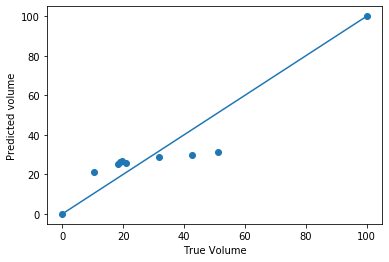

In [49]:
plt.scatter(expected, predicted)
plt.plot([0, 100], [0,100], '-o')
plt.axis('tight')
plt.xlabel('True Volume')
plt.ylabel('Predicted volume')
print('RMS', np.sqrt(np.mean((predicted-expected)**2)))

# Do it after Numpy 5 and Scipy

Best fit line: y = 5.06585642284 x -36.9434591246 , r = 0.967119368256


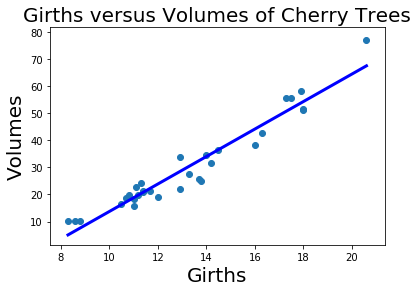

In [27]:
from scipy.stats import linregress

slope, intercept, r, p, stderr = linregress(girths, volumes)

print "Best fit line: y =", slope, "x", intercept, ", r =",r


xvalues = np.linspace(min(girths), max(girths), 200) # this fills the range from min to max with 200 
                                                     # equally spaced points
yvalues = slope * xvalues + intercept

plt.figure()
plt.plot(xvalues, yvalues, linewidth=3.0, color='blue', linestyle='solid')
plt.scatter(girths, volumes)
plt.xlabel("Girths", fontsize=20)
plt.ylabel("Volumes", fontsize=20)
plt.title("Girths versus Volumes of Cherry Trees", fontsize=20)
plt.show()

Looks good, but could be better. It looks like it curves downward first. __Could we fit a quadratic?__

To do so, we have to use the `scipy.optimize` module's `curve_fit` function, which takes a function, input values, and output values, and returns the optimal parameters in the form `popt`.

In [14]:
from scipy.optimize import curve_fit

def quadratic(x, a, b, c):
    return  a * x**2 + b * x + c


popt, pcov = curve_fit(quadratic, girths, volumes)
print ("Fitted quadratic is", popt[0], "x^2 +", popt[1], "+", popt[2])

Fitted quadratic is 0.2545375695629614 x^2 + -2.0921395939102876 + 10.786265694920928


In [15]:
yvalues_quad = [quadratic(x, popt[0], popt[1], popt[2]) for x in xvalues]
plt.plot(xvalues, yvalues_quad, color='red', linestyle='-', label='Quadratic')
plt.plot(xvalues, yvalues, linewidth=3.0, color='blue', linestyle='solid', label='Linear')
plt.scatter(girths, volumes)
plt.legend(loc='best')# this automatically finds the best location for the legend
plt.show()

NameError: name 'xvalues' is not defined

Cool. We've explored some data and fit two different curves.
Now let's try doing some __interpolation__. We'll use the cosine function.

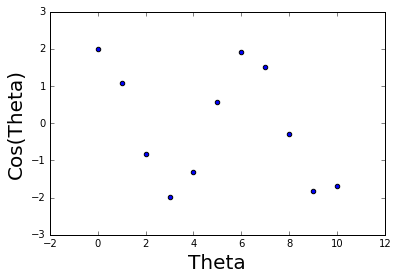

In [16]:
r = 2.0
thetas = np.linspace(0, 10, num=11)

x = r * np.cos(thetas)
plt.scatter(thetas, x)
plt.xlabel("Theta", fontsize=20)
plt.ylabel("Cos(Theta)", fontsize=20)
plt.show()

The `interp1d` function returns a function that you can call 
You can choose the type of interpolation to perform between points. By default, it's linear, but you can also fit higher order polyomials, which will fit the data better.

In [17]:
from scipy.interpolate import interp1d
f = interp1d(thetas, x)
f2 = interp1d(thetas, x, kind='cubic')

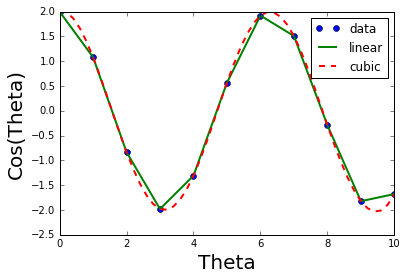

In [18]:
# These give functions
new_thetas = np.linspace(0, 10, num=51)
plt.plot(thetas, x, 'o', new_thetas , f(new_thetas ), '-', new_thetas,  f2(new_thetas), '--', linewidth=2.0)
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.xlabel("Theta", fontsize=20)
plt.ylabel("Cos(Theta)", fontsize=20)
plt.show()